In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

In [5]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

/var/folders/_c/g8l6fbnd6ld4st_vn81qh9d80000gn/T/ipykernel_45689/3099769027.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [9]:
df = pd.read_csv("/Users/b-22/DA_practice/DA_practice/data/소상공인시장진흥공단_상가(상권)정보_서울_202406.csv",low_memory=False)
df.shape

(460437, 39)

In [10]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     460437 non-null  object 
 1   상호명        460437 non-null  object 
 2   지점명        9092 non-null    object 
 3   상권업종대분류코드  460437 non-null  object 
 4   상권업종대분류명   460437 non-null  object 
 5   상권업종중분류코드  460437 non-null  object 
 6   상권업종중분류명   460437 non-null  object 
 7   상권업종소분류코드  460437 non-null  object 
 8   상권업종소분류명   460437 non-null  object 
 9   표준산업분류코드   460346 non-null  object 
 10  표준산업분류명    460346 non-null  object 
 11  시도코드       460437 non-null  int64  
 12  시도명        460437 non-null  object 
 13  시군구코드      460437 non-null  int64  
 14  시군구명       460437 non-null  object 
 15  행정동코드      460437 non-null  int64  
 16  행정동명       460437 non-null  object 
 17  법정동코드      460437 non-null  int64  
 18  법정동명       460437 non-null  object 
 19  지번코드       460437 non-n

In [12]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
460432,MA0101202310A0038359,마스터부동산중개사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1150010500107970001000001,퀸즈파크나인,서울특별시 강서구 공항대로 247,157805,7803,NaN,NaN,NaN,126.834810,37.559341
460433,MA0101202310A0035270,그릿뷰티아카데미학원,NaN,P1,교육,P106,기타 교육,P10625,기타 기술/직업 훈련학원,P85669,...,1126010100104720005000033,대도빌딩,서울특별시 중랑구 사가정로 409,131813,2214,NaN,1,NaN,127.090213,37.580598
460434,MA0101202310A0078533,최지원렌탈,NaN,S2,수리·개인,S205,가전제품 수리,S20501,가전제품 수리업,S95310,...,1154510200109660001000001,한양수자인아파트,서울특별시 금천구 시흥대로150길 6,153013,8540,NaN,2,NaN,126.899154,37.475441
460435,MA0101202310A0059884,매직노래연습장,NaN,R1,예술·스포츠,R104,유원지·오락,R10407,노래방,R91223,...,1153010200101390124016658,NaN,서울특별시 구로구 구로중앙로 23,152846,8312,NaN,지,NaN,126.891074,37.492071
460436,MA0101202310A0062853,곱창꾼,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1154510300109540004016744,NaN,서울특별시 금천구 시흥대로26길 11-7,153861,8652,NaN,1,NaN,126.904333,37.442069


In [13]:
df.dtypes

상가업소번호        object
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지        float64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호          int64
동정보          float64
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [14]:
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460432,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
460433,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
460434,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
460435,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False


In [16]:
# True == 1
df.isnull().sum()

상가업소번호            0
상호명               0
지점명          451345
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드         91
표준산업분류명          91
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         75547
지번주소              0
도로명코드            29
도로명               0
건물본번지            30
건물부번지        399916
건물관리번호           30
건물명          240972
도로명주소             0
구우편번호             0
신우편번호             0
동정보          460437
층정보          142577
호정보          460437
경도                0
위도                0
dtype: int64

In [17]:
null_count = df.isnull().sum()
null_count

상가업소번호            0
상호명               0
지점명          451345
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드         91
표준산업분류명          91
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         75547
지번주소              0
도로명코드            29
도로명               0
건물본번지            30
건물부번지        399916
건물관리번호           30
건물명          240972
도로명주소             0
구우편번호             0
신우편번호             0
동정보          460437
층정보          142577
호정보          460437
경도                0
위도                0
dtype: int64

<Axes: >

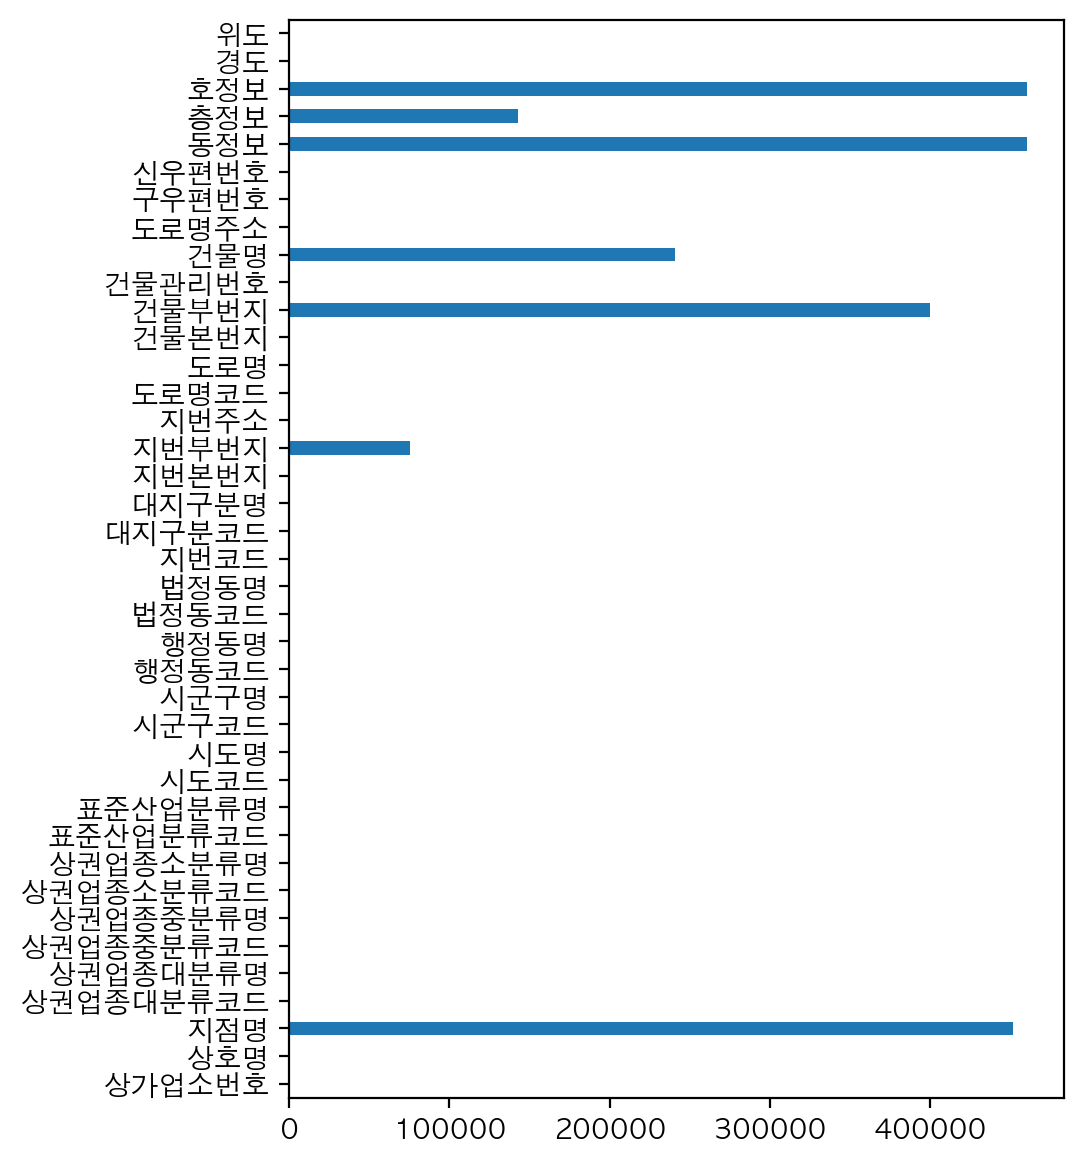

In [21]:
null_count.plot.barh(figsize=(5,7))

In [23]:
df_null_count = null_count.reset_index()
df_null_count

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,451345
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,91


In [25]:
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,451345
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,91


In [27]:
df_null_count = df_null_count.sort_values(by="결측치수", ascending=False)
df_null_count

,컬럼명,결측치수
36,호정보,460437
34,동정보,460437
2,지점명,451345
28,건물부번지,399916
30,건물명,240972
35,층정보,142577
23,지번부번지,75547
10,표준산업분류명,91
9,표준산업분류코드,91
27,건물본번지,30


In [33]:
df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
36,호정보,460437
34,동정보,460437
2,지점명,451345
28,건물부번지,399916
30,건물명,240972
35,층정보,142577
23,지번부번지,75547
10,표준산업분류명,91
9,표준산업분류코드,91
27,건물본번지,30


In [30]:
# 지점명 컬럼
# NaN == Not a Number, 결측치

df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: 지점명, dtype: object

In [36]:
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['호정보',
 '동정보',
 '지점명',
 '건물부번지',
 '건물명',
 '층정보',
 '지번부번지',
 '표준산업분류명',
 '표준산업분류코드',
 '건물본번지']

In [38]:
df[drop_columns].head()

,호정보,동정보,지점명,건물부번지,건물명,층정보,지번부번지,표준산업분류명,표준산업분류코드,건물본번지
0,NaN,NaN,NaN,NaN,NaN,1,21.0,한식 일반 음식점업,I56111,172.0
1,NaN,NaN,NaN,NaN,유성장,NaN,NaN,여관업,I55102,11.0
2,NaN,NaN,NaN,NaN,삼부프라자,NaN,19.0,태권도 및 무술 교육기관,P85611,242.0
3,NaN,NaN,NaN,NaN,백송주택,NaN,4.0,사진 처리업,M73303,283.0
4,NaN,NaN,NaN,NaN,마커스빌딩,2,12.0,한식 일반 음식점업,I56111,55.0


In [39]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(460437, 39)
(460437, 29)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460437 entries, 0 to 460436
Data columns (total 29 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     460437 non-null  object 
 1   상호명        460437 non-null  object 
 2   상권업종대분류코드  460437 non-null  object 
 3   상권업종대분류명   460437 non-null  object 
 4   상권업종중분류코드  460437 non-null  object 
 5   상권업종중분류명   460437 non-null  object 
 6   상권업종소분류코드  460437 non-null  object 
 7   상권업종소분류명   460437 non-null  object 
 8   시도코드       460437 non-null  int64  
 9   시도명        460437 non-null  object 
 10  시군구코드      460437 non-null  int64  
 11  시군구명       460437 non-null  object 
 12  행정동코드      460437 non-null  int64  
 13  행정동명       460437 non-null  object 
 14  법정동코드      460437 non-null  int64  
 15  법정동명       460437 non-null  object 
 16  지번코드       460437 non-null  int64  
 17  대지구분코드     460437 non-null  int64  
 18  대지구분명      460437 non-null  object 
 19  지번본번지      460437 non-n